## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

# Logistic Regression

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


## Question 2
## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB


In [6]:
stud9=pd.read_csv('students-data.csv',sep=';')

In [7]:
stud9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [8]:
stud9.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


## Question 3
## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [12]:
 stud9.index_name = 'number' # defining number  is name of index


In [13]:
stud9['number']=stud9.index # copied index value to new column 'number'

In [14]:
stud9.set_index('number',inplace=True) # set number as index

In [15]:
stud9.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [21]:
stud9.sample(10).isnull().values.any() # for sample missing values

False

In [22]:
stud9.isnull().values.any() # for entire data set missing values

False

In [23]:
stud9.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [24]:
stud9.loc[:, stud9.isna().any()]

""
number
0
1
2
3
4
5
6
7
8


## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [28]:
stud9.dtypes.value_counts() # identification of data type and counts


object    17
int64     16
dtype: int64

In [30]:
stud9.select_dtypes(include='int64').head() # all columns with int64 only

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10


In [31]:
stud9.select_dtypes(exclude='int64').head() # columns with object type

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
number,,,,,,,,,,,,,,,,,
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no


## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [32]:
stud9.var(axis=0) # derived variance 

age            1.628285
Medu           1.198445
Fedu           1.184180
traveltime     0.486513
studytime      0.704324
failures       0.553017
famrel         0.803997
freetime       0.997725
goout          1.239388
Dalc           0.793420
Walc           1.658678
health         1.932944
absences      64.049541
G1            11.017053
G2            14.148917
G3            20.989616
dtype: float64

In [33]:
columns =['traveltime','studytime','failures','famrel','freetime','Dalc']
stud9=stud9.drop(columns,axis=1) # dropped variance when value is less than 1


In [34]:
stud9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 394
Data columns (total 27 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
goout         395 non-null int64
Walc          395 non-null int64
health        395 non-null int64
absences      395 non-null int64
G1            395 non-null int64
G2            395 non-null int64
G3            395 no

## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [36]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()



In [37]:
l=['school','sex','address','famsize','Pstatus','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']
for m in l:
    stud9[m]=labelencoder.fit_transform(stud9[m])  # all object variable are transformed to category.
    
    
stud9.head()

#school,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internetromantic

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,6,10,10


## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [38]:
import numpy as np

u=['G1','G2','G3']
stud9[u]= np.where(stud9[u]>=10,1,0) # transformed G1 ,G2 and G3 into 1 and 0 based on the condition.

In [39]:
stud9[u]

,G1,G2,G3
number,,,
0,0,0,0
1,0,0,0
2,0,0,1
3,1,1,1
4,0,1,1
5,1,1,1
6,1,1,1
7,0,0,0
8,1,1,1


In [40]:
stud9.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,0,0,0
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,0,0,0
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,0,0,1
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,1,1,1
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,0,1,1


## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [41]:
X=stud9.drop(labels='G3',axis=1) # Features are assigned to X
y=stud9['G3'] #target is assigned to y

In [42]:
print(X.head())

        school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  \
number                                                                        
0            0    0   18        1        0        0     4     4     0     4   
1            0    0   17        1        0        1     1     1     0     2   
2            0    0   15        1        1        1     1     1     0     2   
3            0    0   15        1        0        1     4     2     1     3   
4            0    0   16        1        0        1     3     3     2     2   

        ...  nursery  higher  internet  romantic  goout  Walc  health  \
number  ...                                                             
0       ...        1       1         0         0      4     1       3   
1       ...        0       1         1         0      3     1       3   
2       ...        1       1         1         0      2     3       3   
3       ...        1       1         1         1      2     1       5   
4       

In [43]:
print(y.head())

number
0    0
1    0
2    1
3    1
4    1
Name: G3, dtype: int64


## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*

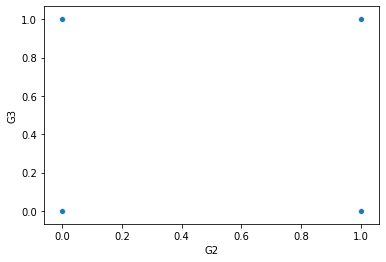

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x='G2',y='G3',data=stud9) # plot between two variables after they are categorised.


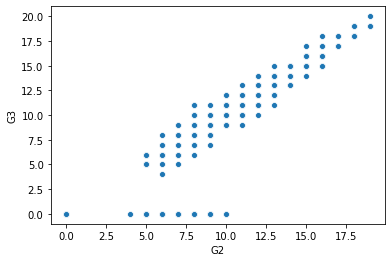

In [52]:
stud10=pd.read_csv('students-data.csv',sep=';') # importing data again to view plots
sns.scatterplot(x='G2',y='G3',data=stud10) # Dataset imported again only to view the plot on uncategorised data.
# Plot is giving an understanding of G2 is influencing the result of G3 strongly .

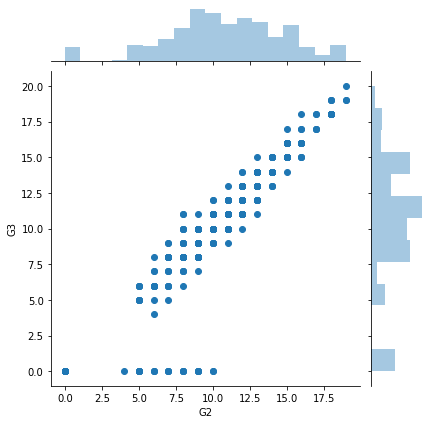

In [49]:
sns.jointplot(stud10['G2'],stud10['G3']) # here scattered plot not on categorised G2 and G3 and has a relatively strong corelation is found

In [50]:
stud10.corr() # G2 and g3, not categorised, has comparatevely a strong coorelation 0.90. 

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660


In [53]:
stud9.corr() # G2 and g3, categorised, has comparatevely a strong coorelation 0.825 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
school,1.000000,-0.012286,0.377610,-0.279797,0.064866,0.045923,-0.133333,-0.079807,-0.056670,0.018974,...,-0.024150,-0.133578,0.060700,-0.007152,0.065087,-0.042651,-0.088480,-0.007620,-0.049010,-0.031254
sex,-0.012286,1.000000,-0.028606,-0.028504,0.089862,0.023443,0.078228,0.034878,0.191421,0.084957,...,-0.151056,0.044113,-0.102023,0.075897,0.274194,0.143588,-0.066962,0.076348,0.064276,0.070618
age,0.377610,-0.028606,1.000000,-0.146722,0.037847,0.029598,-0.163658,-0.163438,-0.069104,-0.035191,...,-0.209081,-0.112094,0.164669,0.126964,0.117276,-0.062187,0.175230,-0.062674,-0.157843,-0.179645
address,-0.279797,-0.028504,-0.146722,1.000000,0.072472,-0.042572,0.138804,0.072178,0.108818,-0.001911,...,0.042854,0.216842,0.005257,0.068835,-0.101126,-0.040355,-0.027874,0.055338,0.094195,0.052282
famsize,0.064866,0.089862,0.037847,0.072472,1.000000,-0.149612,-0.043068,-0.058879,0.071386,-0.084448,...,-0.005806,0.000720,0.034395,0.023064,0.103425,-0.028992,0.035783,0.034724,0.071031,0.041842
Pstatus,0.045923,0.023443,0.029598,-0.042572,-0.149612,1.000000,-0.123565,-0.088730,-0.054476,0.033892,...,-0.040735,0.070074,-0.040451,0.003459,0.006045,0.022307,-0.134937,-0.012787,-0.019852,-0.044050
Medu,-0.133333,0.078228,-0.163658,0.138804,-0.043068,-0.123565,1.000000,0.623455,0.454805,0.157920,...,0.168845,0.201463,0.039681,0.064094,-0.047123,-0.046878,0.100285,0.204648,0.169848,0.115396
Fedu,-0.079807,0.034878,-0.163438,0.072178,-0.058879,-0.088730,0.623455,1.000000,0.243327,0.200169,...,0.174566,0.127507,0.015602,0.043105,-0.012631,0.014742,0.024473,0.209010,0.193714,0.108057
Mjob,-0.056670,0.191421,-0.069104,0.108818,0.071386,-0.054476,0.454805,0.243327,1.000000,0.196758,...,0.097887,0.216969,-0.062999,0.003169,-0.012051,0.065220,0.050254,0.073532,0.037497,0.026592
Fjob,0.018974,0.084957,-0.035191,-0.001911,-0.084448,0.033892,0.157920,0.200169,0.196758,1.000000,...,-0.045250,0.035777,-0.000583,0.010340,0.070024,-0.018058,0.008196,0.036116,0.006251,0.028309



The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


## Question 8

*Plot the number of students in each school and number of students with different ages in separate plots.*

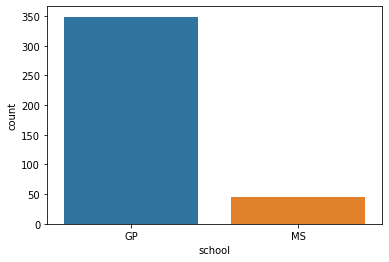

In [55]:
sns.countplot('school',data=stud10) # plot of students based on school

In [56]:
stud10['school'].value_counts() # no of students school wise

GP    349
MS     46
Name: school, dtype: int64

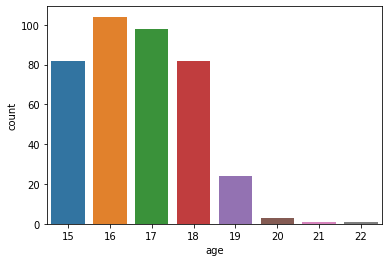

In [58]:
sns.countplot('age',data=stud9) # plot of students age wise

In [57]:
stud9['age'].value_counts() #no of students age wise

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [59]:
# as per given number there will be 24% for test set and 76% for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(300, 26)
(95, 26)
(300,)
(95,)


## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [62]:
model = LogisticRegression() # assigned

In [63]:
model.fit(X_train,y_train) 


C:\Users\SKUMARJH\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [77]:
print("Test Score :",model.score(X_test,y_test)) # Test Score

Test Score : 0.9052631578947369


In [76]:
print("Training Score :",model.score(X_train,y_train)) # Training score

Training Score : 0.9333333333333333


In [66]:
y_predict=model.predict(X_test)
print(metrics.confusion_matrix(y_test, y_predict)) # confusion matrix

[[25  3]
 [ 6 61]]


In [79]:
print("Test F1:Score: ", metrics.f1_score(y_test, y_predict))  # Test F1 score

Test F1:Score:  0.931297709923664


In [71]:
print(metrics.classification_report(y_test, y_predict)) # Test Classification

              precision    recall  f1-score   support

           0       0.81      0.89      0.85        28
           1       0.95      0.91      0.93        67

    accuracy                           0.91        95
   macro avg       0.88      0.90      0.89        95
weighted avg       0.91      0.91      0.91        95



In [80]:
X_predict=model.predict(X_train)
print("Training F1:Score :",metrics.f1_score(y_train, X_predict)) #Training F1 score

Training F1:Score : 0.9484536082474226


In [73]:
print(metrics.classification_report(y_train, X_predict)) # training Classification

              precision    recall  f1-score   support

           0       0.87      0.94      0.91       102
           1       0.97      0.93      0.95       198

    accuracy                           0.93       300
   macro avg       0.92      0.94      0.93       300
weighted avg       0.94      0.93      0.93       300



# Naive bayes with Iris data

### Import Iris.csv

In [86]:
df=pd.read_csv('Iris (2).csv')

In [87]:
df.head()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [96]:
df['Species']=labelencoder.fit_transform(df['Class']) # Species a new target  with categorical values of Class

In [161]:
df.sample(10) # 10 sample data to display 

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class,Species
115,6.4,3.2,5.3,2.3,Iris-virginica,2
134,6.1,2.6,5.6,1.4,Iris-virginica,2
124,6.7,3.3,5.7,2.1,Iris-virginica,2
133,6.3,2.8,5.1,1.5,Iris-virginica,2
3,4.6,3.1,1.5,0.2,Iris-setosa,0
86,6.7,3.1,4.7,1.5,Iris-versicolor,1
33,5.5,4.2,1.4,0.2,Iris-setosa,0
46,5.1,3.8,1.6,0.2,Iris-setosa,0
39,5.1,3.4,1.5,0.2,Iris-setosa,0
78,6.0,2.9,4.5,1.5,Iris-versicolor,1


In [162]:
df.Species.value_counts() # counts based on Target Species with category

2    50
1    50
0    50
Name: Species, dtype: int64

In [164]:
df.Class.value_counts() # counts based on Target Class

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Class, dtype: int64

### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [165]:
X=df.drop(['Class','Species'],axis=1) # dropping both targets Species with category  and actual Class
y=df['Class'] # assigned actual target Class

In [166]:
print(X.head())
print(y.head())

   Sepal Length (in cm)  Sepal Width in (cm)  Petal length (in cm)  \
0                   5.1                  3.5                   1.4   
1                   4.9                  3.0                   1.4   
2                   4.7                  3.2                   1.3   
3                   4.6                  3.1                   1.5   
4                   5.0                  3.6                   1.4   

   Petal width (in cm)  
0                  0.2  
1                  0.2  
2                  0.2  
3                  0.2  
4                  0.2  
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Class, dtype: object


### Find the distribution of target variable (Class)

In [167]:
df['Class'].value_counts() # counts based on class

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Class, dtype: int64

### Plot the distribution of target variable using histogram

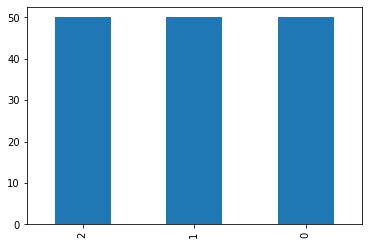

In [170]:
pd.value_counts(df["Species"]).plot(kind="bar") # plots against category

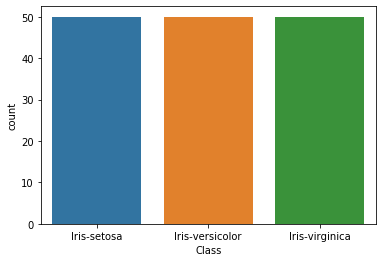

In [171]:
sns.countplot('Class',data=df) # distribution of class 50 each.

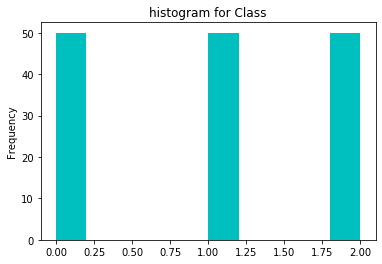

In [172]:
df.Species.plot(kind='hist', title='histogram for Class', color='c') # Histogram plot agsint category

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

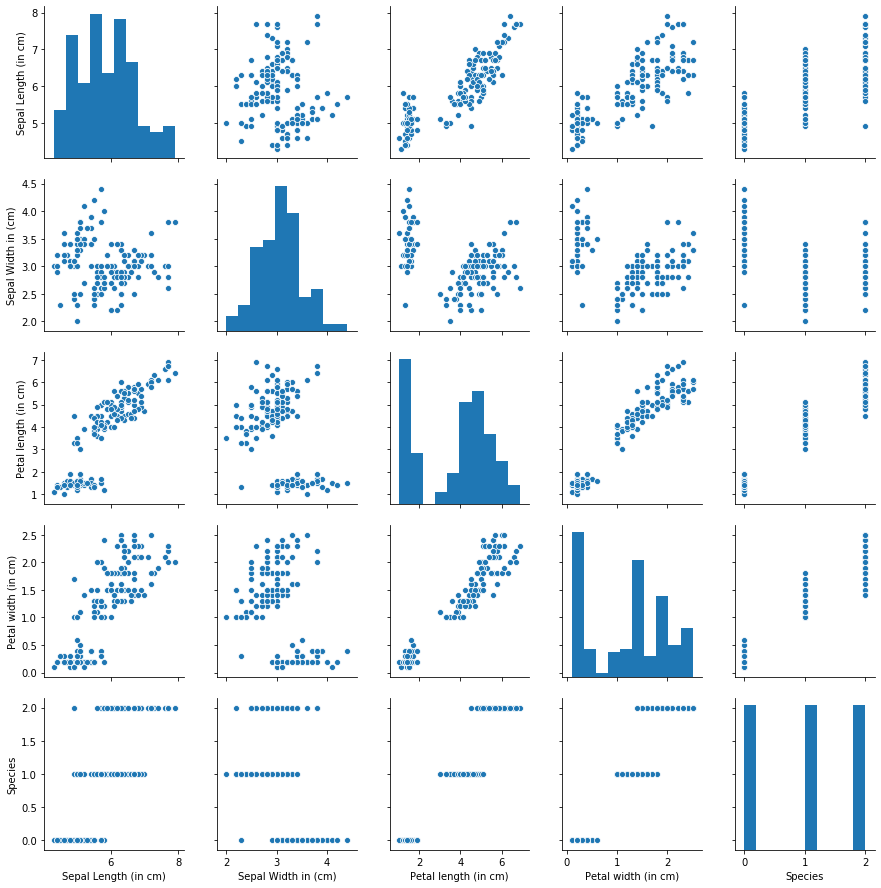

In [150]:
sns.pairplot(df)
# Petal length and Petal width are better correlated
#Sepal witdh has outliers
#Petal length has more variance and left skewed
# Petal width is left skewed as well

### Summary Statistics and explain insights for at least 2 variables

In [149]:
df.describe() # Species Target is included here as its categorical of Class target
# There is no minimum 0 value for any indepndent variable
#Standard deviation for Petal length is relatively high.
# For Petal length and width mean is less than median so they are left skewed.
#Speal Length and width dont have  much difference between mean and median

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


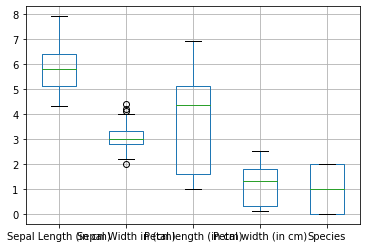

In [105]:
df.boxplot()

### Correlation among all variables and give your insights

In [152]:
df.corr() # Petal length and Petal width are strongly correlated 
# It appears Petal Length and Petal width would affect in prediction more

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Species
Sepal Length (in cm),1.000000,-0.109369,0.871754,0.817954,0.782561
Sepal Width in (cm),-0.109369,1.000000,-0.420516,-0.356544,-0.419446
Petal length (in cm),0.871754,-0.420516,1.000000,0.962757,0.949043
Petal width (in cm),0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


### Split data in Training and Validation in 80:20

In [153]:
# Split on data set where 'Class',not categorised, is a target 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1) 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [154]:
X_train.head()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm)
91,6.1,3.0,4.6,1.4
135,7.7,3.0,6.1,2.3
69,5.6,2.5,3.9,1.1
128,6.4,2.8,5.6,2.1
114,5.8,2.8,5.1,2.4


### Do Feature Scaling

In [155]:
sc = StandardScaler() # declare

In [156]:
X_train_scaled=sc.fit_transform(X_train) # Fit and apply for training data


In [157]:
X_test_scaled=sc.fit_transform(X_test) #Fit and apply for test data

### Train and Fit NaiveBayes Model

In [158]:
model = GaussianNB()
model.fit(X_train_scaled, y_train) #Naive Bayes model applied

GaussianNB(priors=None, var_smoothing=1e-09)

### Print Accuracy and Confusion Matrix and Conclude your findings

In [159]:
model.score(X_test_scaled,y_test) # Test Score

0.9

In [160]:
model.score(X_train_scaled,y_train) # training score

0.95

In [ ]:
# Training accuracy with scaled data is 95% however model accuracy is 90% so we can say its slightly overfit.

In [173]:
y_predict=model.predict(X_test_scaled)
print(metrics.confusion_matrix(y_test, y_predict)) # Confusion matrix

[[11  0  0]
 [ 0 10  3]
 [ 0  0  6]]
